# **Breast Cancer Detection Using Transfer Learning**



Mount G-Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger
import tensorflow as tf
import pickle
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

Dataset

In [ ]:
!unzip '/content/gdrive/MyDrive/DataSet.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/Benign/22678646 (43).png  
  inflating: train/Benign/22678646 (46).png  
  inflating: train/Benign/22678646 (47).png  
  inflating: train/Benign/22678646 (48).png  
  inflating: train/Benign/22678646 (5).png  
  inflating: train/Benign/22678646 (51).png  
  inflating: train/Benign/22678646 (53).png  
  inflating: train/Benign/22678646 (55).png  
 extracting: train/Benign/22678646 (56).png  
  inflating: train/Benign/22678646 (58).png  
  inflating: train/Benign/22678646 (59).png  
  inflating: train/Benign/22678646 (61).png  
  inflating: train/Benign/22678646 (66).png  
  inflating: train/Benign/22678646 (67).png  
  inflating: train/Benign/22678646 (69).png  
 extracting: train/Benign/22678646 (9).png  
 extracting: train/Benign/22678694 (10).png  
 extracting: train/Benign/22678694 (11).png  
 extracting: train/Benign/22678694 (12).png  
  inflating: train/Benign/22678694 (16).png  
  inflating: train/Benign/22678

In [ ]:
!cp -r '/content/gdrive/MyDrive/DataSet.zip' '/content/gdrive/MyDrive/breastcancer'

Train Test Split

In [ ]:
train = datagen.flow_from_directory('/content/train', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/val', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/test', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train)

In [ ]:
imgs1, labels1 = next(test)

In [ ]:
imgs.shape

(64, 224, 224, 3)

In [ ]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

In [ ]:
#plt.imshow(imgs[0])
#print(labels[0])

Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [ ]:
callback = EarlyStopping(
monitor="val_loss",
min_delta=0.00001,
patience=0,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False
)

In [ ]:
history = model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=val,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=25,callbacks=callback
                    ) 
model.save('/content/gdrive/My Drive/first_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
59/59 [==============================] - 25s 165ms/step - loss: 0.6503 - accuracy: 0.6660 - val_loss: 0.6362 - val_accuracy: 0.6719
Epoch 2/25
59/59 [==============================] - 9s 157ms/step - loss: 0.6403 - accuracy: 0.6684 - val_loss: 0.6332 - val_accuracy: 0.6681
Epoch 2: early stopping


In [ ]:
history = model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=val,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=25
                    ) 
model.save('/content/gdrive/My Drive/first_model.h5')

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 11s 193ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.4978 - val_accuracy: 0.9057
Epoch 2/25
59/59 [==============================] - 12s 209ms/step - loss: 0.0546 - accuracy: 0.9845 - val_loss: 0.5453 - val_accuracy: 0.9041
Epoch 3/25
59/59 [==============================] - 9s 150ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.5958 - val_accuracy: 0.8949
Epoch 4/25
59/59 [==============================] - 9s 150ms/step - loss: 0.0531 - accuracy: 0.9813 - val_loss: 0.5597 - val_accuracy: 0.9019
Epoch 5/25
59/59 [==============================] - 9s 147ms/step - loss: 0.0439 - accuracy: 0.9875 - val_loss: 0.5573 - val_accuracy: 0.9019
Epoch 6/25
59/59 [==============================] - 9s 149ms/step - loss: 0.0456 - accuracy: 0.9875 - val_loss: 0.6007 - val_accuracy: 0.9014
Epoch 7/25
59/59 [==============================] - 9s 148ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.5146 - val_accuracy: 0.9036
Epoch 8/25
59/5

In [ ]:
model.predict(imgs1)

array([[5.3916392e-07],
       [2.4350295e-04],
       [9.9999976e-01],
       [9.9999559e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999654e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999785e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.5267894e-02],
       [4.7637401e-03],
       [9.9983668e-01],
       [1.3508905e-03],
       [9.9892598e-01],
       [1.0000000e+00],
       [2.2521269e-04],
       [1.0000000e+00],
       [9.9999964e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9990129e-01],
       [4.0682060e-01],
       [1.1772948e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9996185e-01],
       [1.0000000e+00],
       [8.0192304e-01],
       [1.0000000e+00],
       [9.9999964e-01],
       [9.9999976e-01],
       [3.0327154e-05],
       [1.0000000e+00],
       [9.999834

Visualisation

In [ ]:
import pandas as pd
log_data = pd.read_csv('/content/gdrive/My Drive/training.log', sep=',', engine='python')

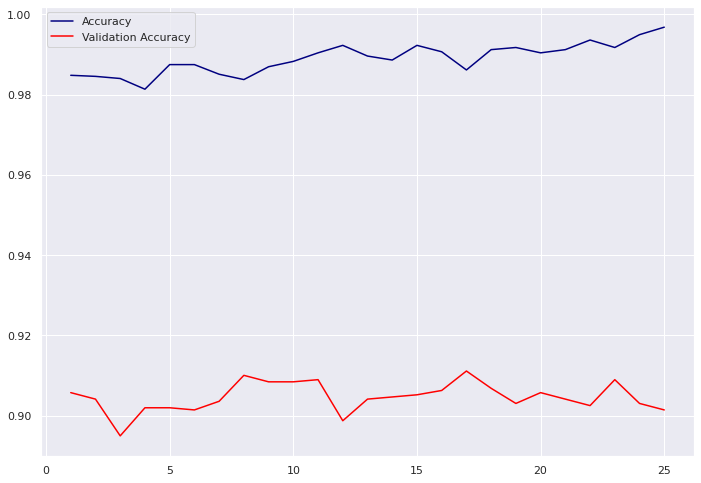

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

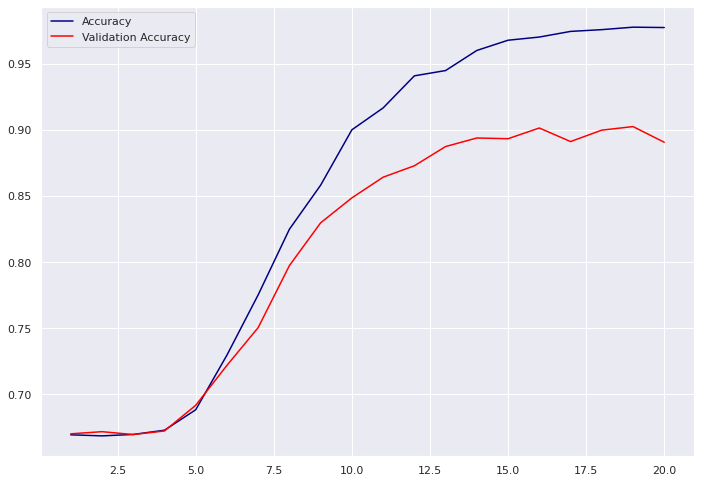

In [ ]:
# show the accuracy graph from the saved history (log_data)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

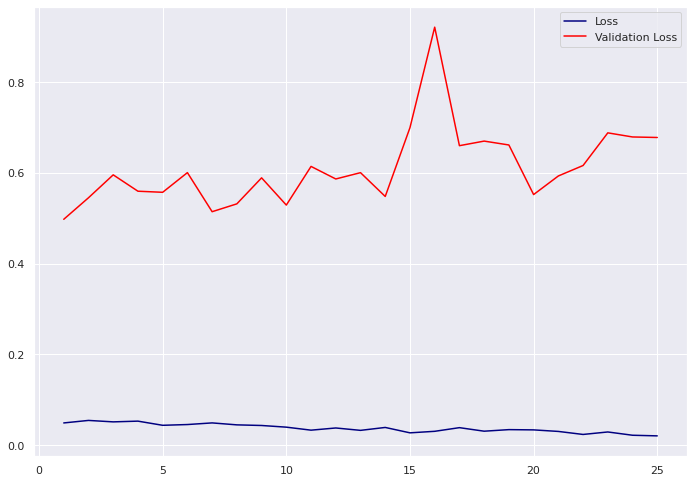

In [ ]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

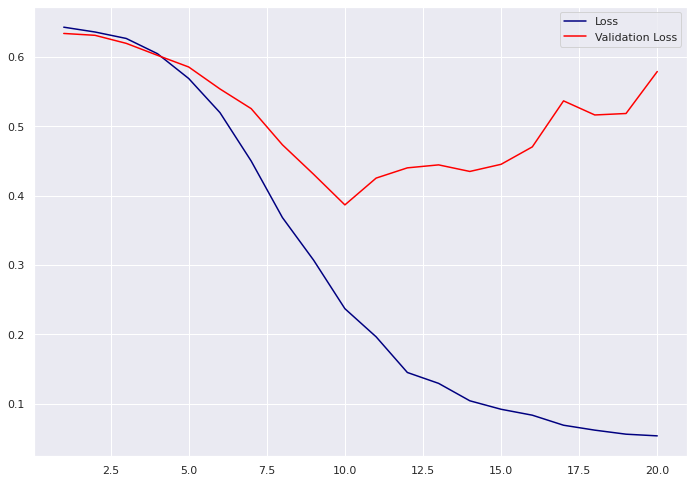

In [ ]:
# show the loss graph from the saved history (log_data)

plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/gdrive/My Drive/first_model.h5')

In [ ]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a) 
    y_test.extend(b)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
pickle.dump(X_test, open('/content/gdrive/My Drive/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/My Drive/y_test.pkl', 'wb'))

In [ ]:
X_test = pickle.load(open('/content/gdrive/My Drive/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/y_test.pkl', 'rb'))

In [ ]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6303077340126038 / Test accuracy: 0.8965517282485962


In [ ]:
# Using the saved model
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6303077340126038 / Test accuracy: 0.8965517282485962


In [ ]:
y_pred_prob = model.predict(X_test)

In [ ]:
# Using the saved model
y_pred_prob = restored_model.predict(X_test)

In [ ]:
y_pred_prob

array([[0.99939513],
       [0.00366101],
       [0.99999976],
       ...,
       [1.        ],
       [1.        ],
       [0.9999999 ]], dtype=float32)

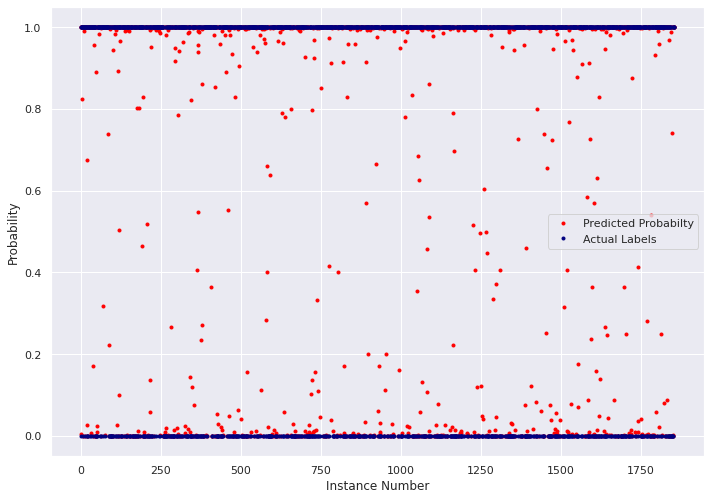

In [ ]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [ ]:
y_test

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([1, 0, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

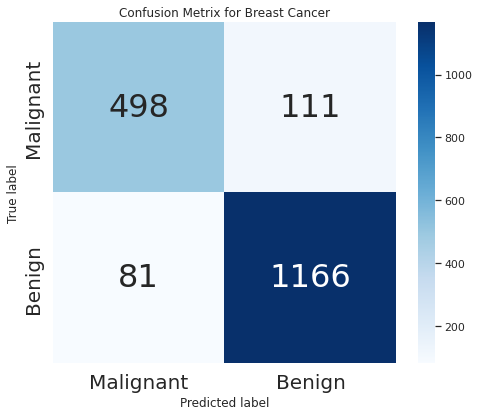

In [ ]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.86      0.82      0.84       609
Malignant (Class 1)       0.91      0.94      0.92      1247

           accuracy                           0.90      1856
          macro avg       0.89      0.88      0.88      1856
       weighted avg       0.90      0.90      0.90      1856



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

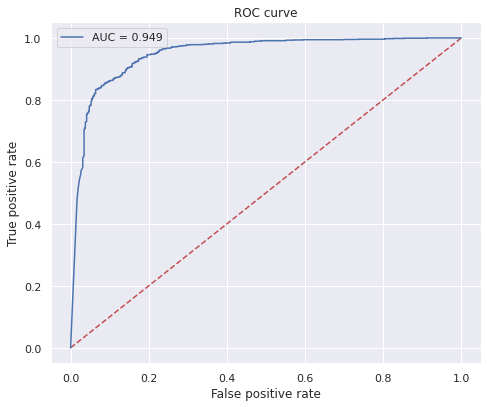

In [ ]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

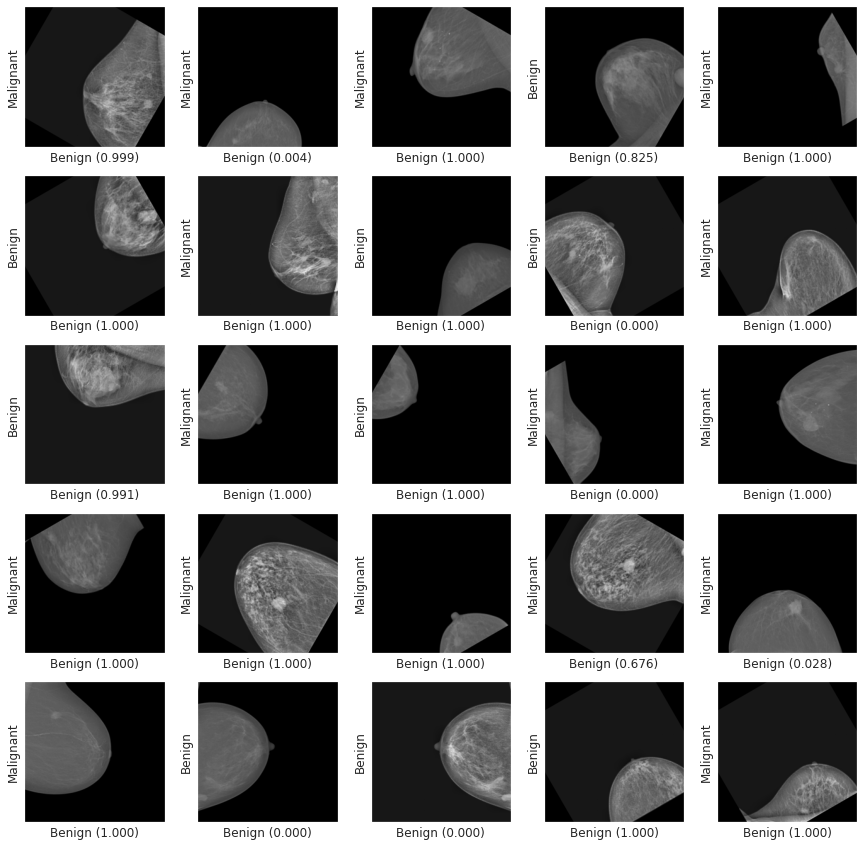

In [ ]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))

# Transfer Learning using VGG16 Feature Extraction 

![image.png](
  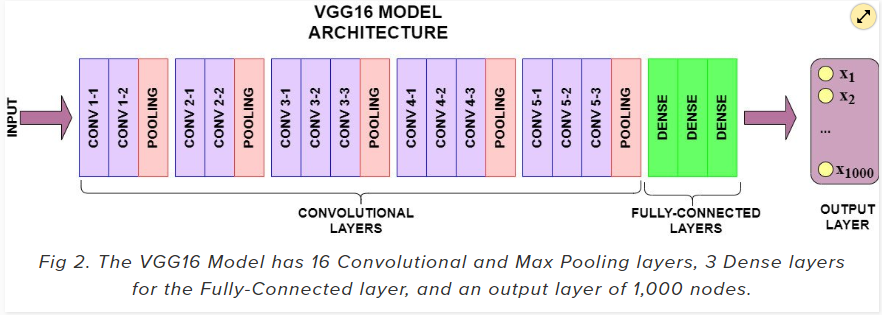
)

In [ ]:
from keras.applications.vgg16 import VGG16

backbone = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
backbone.trainable = False

In [ ]:
VGG_model = Sequential()
VGG_model.add(backbone)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())
VGG_model.add(Dropout(0.5))
VGG_model.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                      

In [ ]:
# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = VGG_model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model.save('/content/gdrive/My Drive/VGG_model.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 38s 546ms/step - loss: 0.7835 - accuracy: 0.5749 - val_loss: 0.8086 - val_accuracy: 0.3567
Epoch 2/10
59/59 [==============================] - 27s 463ms/step - loss: 0.5832 - accuracy: 0.7010 - val_loss: 0.6194 - val_accuracy: 0.6643
Epoch 3/10
59/59 [==============================] - 28s 483ms/step - loss: 0.5102 - accuracy: 0.7511 - val_loss: 0.6089 - val_accuracy: 0.6476
Epoch 4/10
59/59 [==============================] - 28s 468ms/step - loss: 0.4383 - accuracy: 0.7900 - val_loss: 0.5550 - val_accuracy: 0.7155
Epoch 5/10
59/59 [==============================] - 28s 474ms/step - loss: 0.3960 - accuracy: 0.8268 - val_loss: 0.5790 - val_accuracy: 0.6880
Epoch 6/10
59/59 [==============================] - 28s 470ms/step - loss: 0.3469 - accuracy: 0.8478 - val_loss: 0.4414 - val_accuracy: 0.8109
Epoch 7/10
59/59 [==============================] - 28s 471ms/step - loss: 0.3069 - accuracy: 0.8715 - val_loss: 0.3976 - val_accuracy: 0.8265
Epoch 8/10

In [ ]:
VGG_model = load_model('/content/gdrive/My Drive/VGG_model.h5')

In [ ]:
score1 = VGG_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

Test loss: 0.3301745057106018 / Test accuracy: 0.860991358757019


In [ ]:
y_pred_prob_2 = VGG_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_2 = np.where(y_pred_prob_2 > threshold, 1,0)
y_pred_2.squeeze()

array([1, 0, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

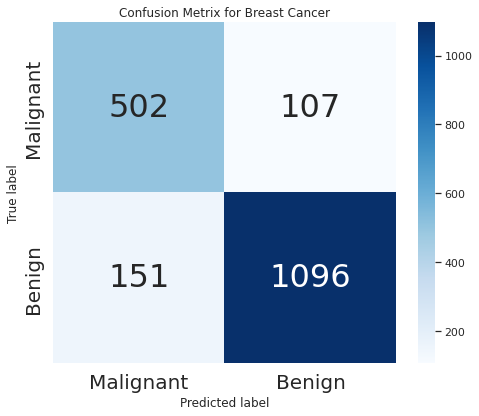

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_2),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_2, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.77      0.82      0.80       609
Malignant (Class 1)       0.91      0.88      0.89      1247

           accuracy                           0.86      1856
          macro avg       0.84      0.85      0.85      1856
       weighted avg       0.86      0.86      0.86      1856



Fine Tuning

In [ ]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

In [ ]:
backbone.trainable = True

In [ ]:
# Unfreeze final 2 convolution blocks

set_trainable = False
for layer in backbone2.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
VGG_model_2 = Sequential()
VGG_model_2.add(backbone2)
VGG_model_2.add(GlobalAveragePooling2D())
VGG_model_2.add(BatchNormalization())
VGG_model_2.add(Dropout(0.5))
VGG_model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model_2.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,717,249
Trainable params: 12,980,737


In [ ]:
history = VGG_model_2.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model_2.save('/content/gdrive/My Drive/VGG_model_2.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 38s 608ms/step - loss: 0.6495 - accuracy: 0.6277 - val_loss: 0.7993 - val_accuracy: 0.3308
Epoch 2/10
59/59 [==============================] - 34s 581ms/step - loss: 0.4757 - accuracy: 0.7740 - val_loss: 0.5665 - val_accuracy: 0.8082
Epoch 3/10
59/59 [==============================] - 35s 586ms/step - loss: 0.3367 - accuracy: 0.8646 - val_loss: 0.4943 - val_accuracy: 0.8389
Epoch 4/10
59/59 [==============================] - 35s 590ms/step - loss: 0.2318 - accuracy: 0.9054 - val_loss: 0.3364 - val_accuracy: 0.9138
Epoch 5/10
59/59 [==============================] - 35s 590ms/step - loss: 0.1619 - accuracy: 0.9336 - val_loss: 0.2582 - val_accuracy: 0.9138
Epoch 6/10
59/59 [==============================] - 35s 593ms/step - loss: 0.1449 - accuracy: 0.9444 - val_loss: 0.2262 - val_accuracy: 0.8960
Epoch 7/10
59/59 [==============================] - 35s 589ms/step - loss: 0.0958 - accuracy: 0.9638 - val_loss: 0.4292 - val_accuracy: 0.7990
Epoch 8/10

In [ ]:
VGG_model_2 = load_model('/content/gdrive/My Drive/VGG_model_2.h5')

In [ ]:
score2 = VGG_model_2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

Test loss: 0.1251184046268463 / Test accuracy: 0.9493534564971924


In [ ]:
y_pred_prob_3 = VGG_model_2.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_3 = np.where(y_pred_prob_3 > threshold, 1,0)
y_pred_3.squeeze()

array([1, 0, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

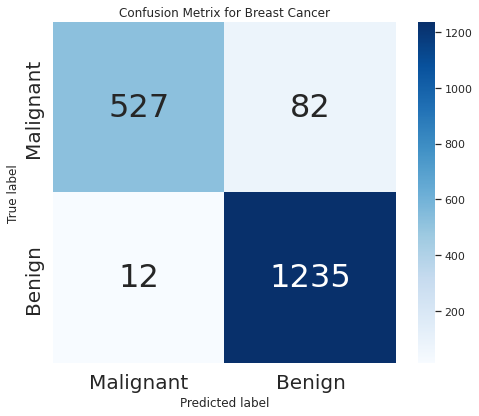

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_3),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_3, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.98      0.87      0.92       609
Malignant (Class 1)       0.94      0.99      0.96      1247

           accuracy                           0.95      1856
          macro avg       0.96      0.93      0.94      1856
       weighted avg       0.95      0.95      0.95      1856



# Transfer Learning using ResNet50

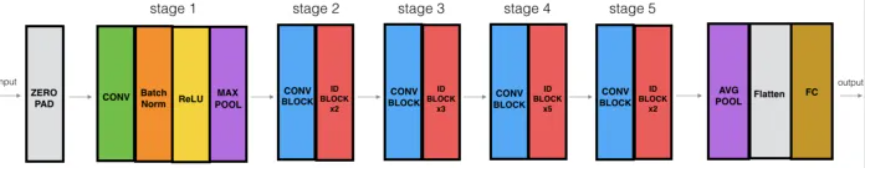

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
backbone3.training = False

In [ ]:
ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D())
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

In [ ]:
ResNet50_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
ResNet50_model.save('/content/gdrive/My Drive/ResNet50_model.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 54s 776ms/step - loss: 0.4739 - accuracy: 0.7692 - val_loss: 0.6793 - val_accuracy: 0.6686
Epoch 2/10
59/59 [==============================] - 43s 727ms/step - loss: 0.0972 - accuracy: 0.9693 - val_loss: 0.7000 - val_accuracy: 0.6719
Epoch 3/10
59/59 [==============================] - 43s 727ms/step - loss: 0.0287 - accuracy: 0.9928 - val_loss: 0.6818 - val_accuracy: 0.6105
Epoch 4/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.7005 - val_accuracy: 0.4499
Epoch 5/10
59/59 [==============================] - 44s 738ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.6940 - val_accuracy: 0.4989
Epoch 6/10
59/59 [==============================] - 44s 749ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.6531 - val_accuracy: 0.6536
Epoch 7/10
59/59 [==============================] - 43s 735ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.6979 - val_accuracy: 0.5339
Epoch 8/10

In [ ]:
ResNet50_model = load_model('/content/gdrive/My Drive/ResNet50_model.h5')

In [ ]:
score3 = ResNet50_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

Test loss: 0.7463647723197937 / Test accuracy: 0.665409505367279


In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

array([1, 1, 1, ..., 1, 0, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

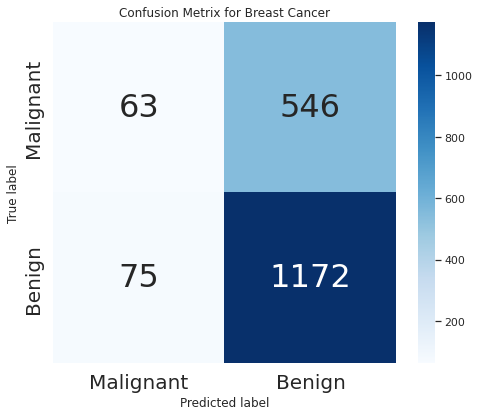

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_4),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_4, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.46      0.10      0.17       609
Malignant (Class 1)       0.68      0.94      0.79      1247

           accuracy                           0.67      1856
          macro avg       0.57      0.52      0.48      1856
       weighted avg       0.61      0.67      0.59      1856

